<a href="https://colab.research.google.com/github/laiyungseng/test/blob/main/Electricity_consumption_Data_Analysis_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fl = pd.read_csv('/content/electricity_consumption.csv')
print(fl)

           date  sector   consumption
0    2018-01-01   total  13156.104056
1    2018-02-01   total  12097.296631
2    2018-03-01   total  14028.979493
3    2018-04-01   total  13604.821689
4    2018-05-01   total  13934.682725
..          ...     ...           ...
463  2024-02-01  losses    724.517838
464  2024-03-01  losses   1273.227617
465  2024-04-01  losses   1045.885614
466  2024-05-01  losses   1294.274307
467  2024-06-01  losses   1032.119622

[468 rows x 3 columns]


##EDA

In [114]:
#@title checking missing number on dataset
##check empty column and missing value
print(f"missing numebr:{fl.isnull().sum()}")
print(len(fl))

missing numebr:date           0
sector         0
consumption    0
year           0
dtype: int64
468


In [115]:
#@title show descriptive stat on dataset

fl.describe()

,date,consumption,year
count,468,468.000000,468.000000
mean,2021-03-16 23:04:36.923076864,6849.375312,2020.769231
min,2018-01-01 00:00:00,45.925750,2018.000000
25%,2019-08-01 00:00:00,1356.940258,2019.000000
50%,2021-03-16 12:00:00,5578.420094,2021.000000
75%,2022-11-01 00:00:00,12567.457672,2022.000000
max,2024-06-01 00:00:00,16396.775174,2024.000000
std,NaN,5615.139798,1.889380


In [7]:
#breakdown sector
print(fl['sector'].value_counts())

sector
total               78
local               78
local_commercial    78
local_domestic      78
exports             78
losses              78
Name: count, dtype: int64


In [34]:
#categories the data into sector
totalconsump = fl[fl['sector']=='total']
localconsump = fl[fl['sector'] == 'local']
local_commerconsump = fl[fl['sector'] == 'local_commercial']
local_domesticconsump = fl[fl['sector'] == 'local_domestic']
local_exportsconsump = fl[fl['sector'] == 'exports']
local_lossesconsump = fl[fl['sector'] == 'losses']

In [36]:
print(totalconsump)
print(localconsump.shape[0])
print(local_commerconsump.shape[0])
print(local_domesticconsump.shape[0])
print(local_exportsconsump.shape[0])
print(local_lossesconsump.shape[0])

          date sector   consumption
0   2018-01-01  total  13156.104056
1   2018-02-01  total  12097.296631
2   2018-03-01  total  14028.979493
3   2018-04-01  total  13604.821689
4   2018-05-01  total  13934.682725
..         ...    ...           ...
73  2024-02-01  total  14560.930989
74  2024-03-01  total  16192.666538
75  2024-04-01  total  15508.054513
76  2024-05-01  total  16396.775174
77  2024-06-01  total  15431.399705

[78 rows x 3 columns]
78
78
78
78
78


##Line chart of Total consumption by each sector
create 6 line plot based on the difference sector consist in the dataset.
The information will be presented on 6 subplot for better comparison on the electricity consumption.


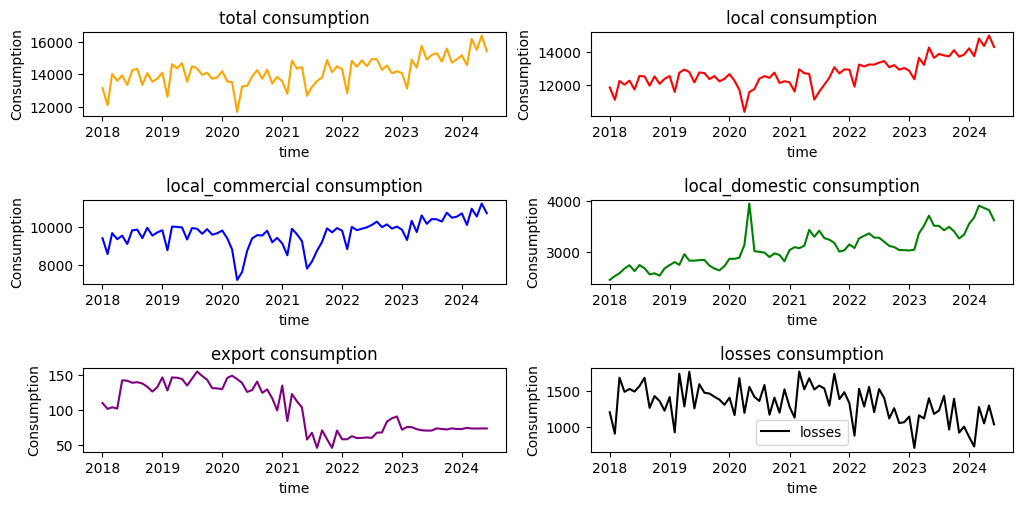

In [94]:
##Plot total sector
fl['date'] = pd.to_datetime(fl['date'])

plt.figure(figsize=[12,12])

# first subplot-total consumption
plt.subplot(6,2,1)
plt.plot(fl[fl['sector']=='total']['date'],totalconsump['consumption'], color='orange')
plt.title('total consumption')
plt.xlabel('time')
plt.ylabel('Consumption')

#second subplot-local consumption
plt.subplot(6,2,2)
plt.plot(fl[fl['sector']=='local']['date'],fl[fl['sector']=='local']['consumption'], color='red')
plt.title('local consumption')
plt.xlabel('time')
plt.ylabel('Consumption')

#third subplot-local_commercial consumption
plt.subplot(6,2,3)
plt.plot(fl[fl['sector']=='local_commercial']['date'],fl[fl['sector']=='local_commercial']['consumption'], color='blue')
plt.title('local_commercial consumption')
plt.xlabel('time')
plt.ylabel('Consumption')

#third subplot-local_domestic consumption
plt.subplot(6,2,4)
plt.plot(fl[fl['sector']=='local_domestic']['date'],fl[fl['sector']=='local_domestic']['consumption'], color='green')
plt.title('local_domestic consumption')
plt.xlabel('time')
plt.ylabel('Consumption')

#fourth subplot-exports consumption
plt.subplot(6,2,5)
plt.plot(fl[fl['sector']=='exports']['date'],fl[fl['sector']=='exports']['consumption'], color='purple')
plt.title('export consumption')
plt.xlabel('time')
plt.ylabel('Consumption')

#fifth subplot-losses consumption
plt.subplot(6,2,6)
plt.plot(fl[fl['sector']=='losses']['date'],fl[fl['sector']=='losses']['consumption'], color='black',label='losses')
plt.title('losses consumption')
plt.xlabel('time')
plt.ylabel('Consumption')


plt.legend()
plt.subplots_adjust(hspace=1)
plt.show()


This figure presenting the electrical consumption based on each date until `2024-june-01`.

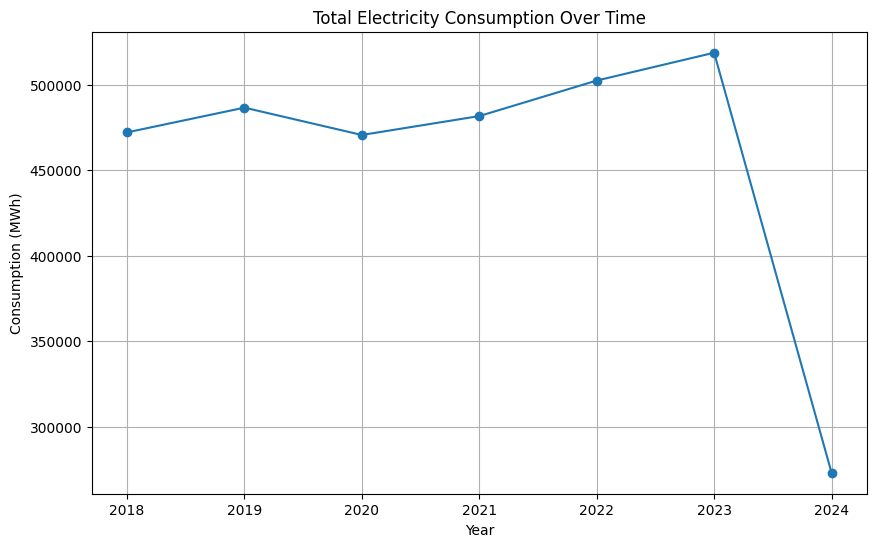

In [113]:
#@title Total electricity consumption by year
fl['year'] = pd.to_datetime(fl['date']).dt.year
total_by_year = fl.groupby('year')['consumption'].sum()

plt.figure(figsize=(10,6))
total_by_year.plot(kind='line', marker='o')
plt.title('Total Electricity Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption (MWh)')
plt.grid(True)
plt.show()


From the statistic display in the figure shows that the electricity consumption was increasing over time from `2018` to `2023`, but decrease in `2024` dramatiscally. This emphasis an invitation of utilization of renewable energy for operation, Hence, this lead to a sharp drop of `electricity consumption` on 2024.

##Displaying total consumption by sector

In [101]:
sector_sum1 = fl['consumption'].groupby(fl['sector']).sum()

In [102]:
sector_sum = fl.groupby('sector')['consumption'].sum()
print(sector_sum)

sector
exports             7.884055e+03
local               9.943969e+05
local_commercial    7.537253e+05
local_domestic      2.406717e+05
losses              1.032744e+05
total               1.105555e+06
Name: consumption, dtype: float64


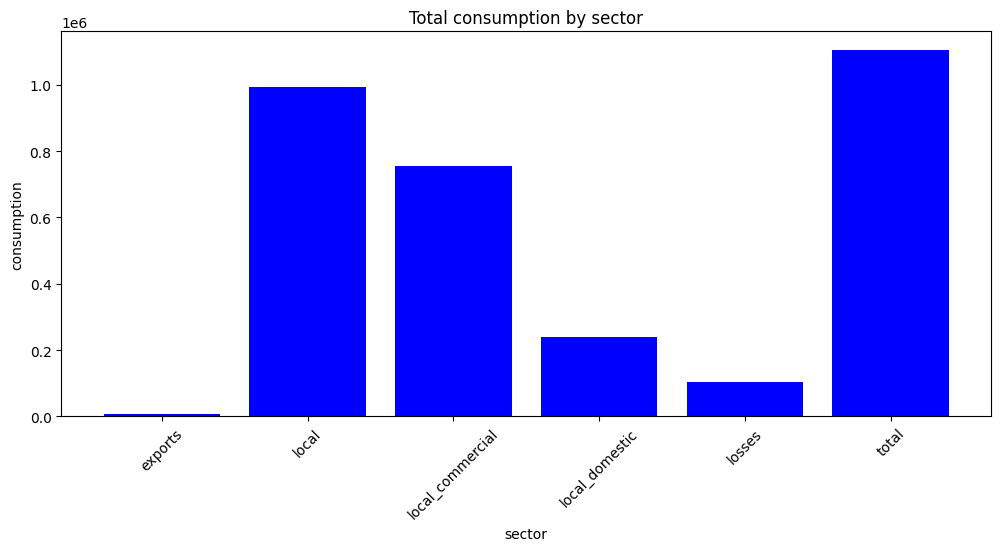

In [105]:
plt.figure(figsize=[12,5])

plt.bar(sector_sum1.index, sector_sum1.values, color='blue')
plt.title('Total consumption by sector')
plt.xlabel('sector')
plt.ylabel('consumption')
plt.xticks(rotation=45)
plt.show()

<a ref='Corr-matrix_and_heatmap'></ref>
##Correllation matrix and heatmap plot

In [110]:
#@title create correlation matrix on each sector and present in heatmap
##correlation matrix
corr_matrix1 = fl[fl['sector']== 'local'].corr(numeric_only=True)
corr_matrix2 = fl[fl['sector']== 'total'].corr(numeric_only=True)
corr_matrix3 = fl[fl['sector']== 'local_commercial'].corr(numeric_only=True)
corr_matrix4 = fl[fl['sector']== 'local_domestic'].corr(numeric_only=True)
corr_matrix5 = fl[fl['sector']== 'exports'].corr(numeric_only=True)
corr_matrix6 = fl[fl['sector']== 'losses'].corr(numeric_only=True)

print(corr_matrix1, corr_matrix2, corr_matrix3, corr_matrix4, corr_matrix5, corr_matrix6)

             consumption
consumption          1.0              consumption
consumption          1.0              consumption
consumption          1.0              consumption
consumption          1.0              consumption
consumption          1.0              consumption
consumption          1.0


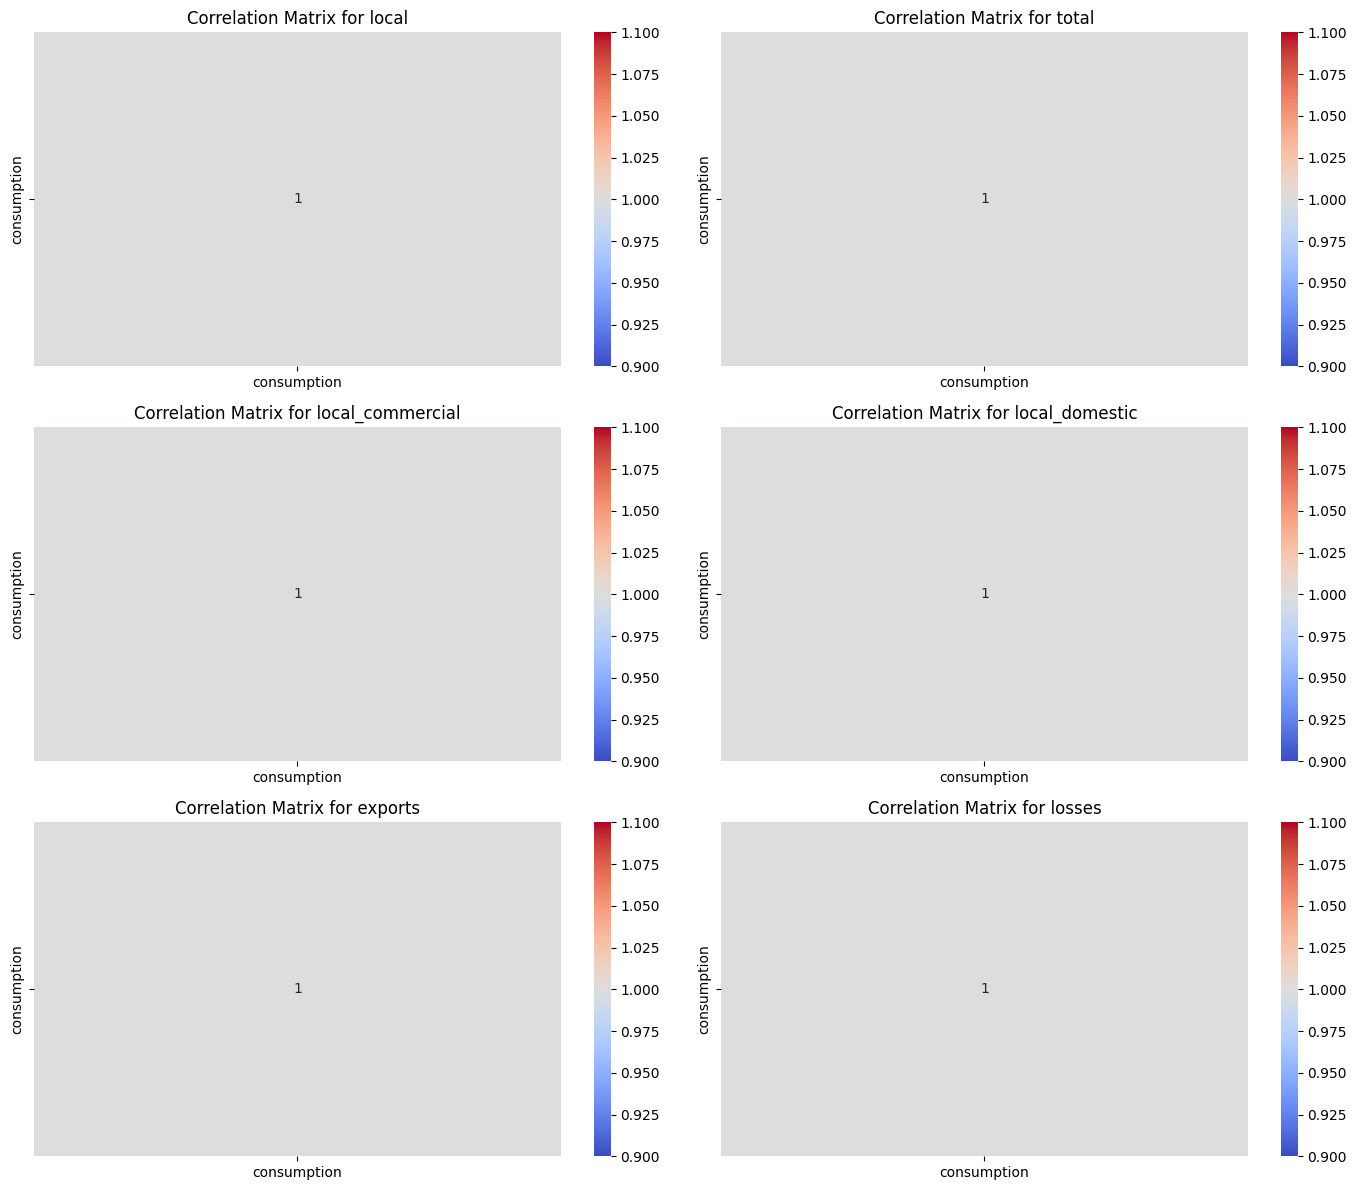

In [111]:
#@title 6x6 Heatmap plot
import seaborn as sns
fig, axes = plt.subplots(3,2, figsize=(14,12))

axes = axes.flatten()

sector_cors = [
    ('local', corr_matrix1),
    ('total', corr_matrix2),
    ('local_commercial', corr_matrix3),
    ('local_domestic', corr_matrix4),
    ('exports', corr_matrix5),
    ('losses', corr_matrix6)
]

for i, (label, matrix) in enumerate(sector_cors):
  sns.heatmap(matrix, annot=True, cmap='coolwarm', ax=axes[i])
  axes[i].set_title(f'Correlation Matrix for {label}')

plt.tight_layout()
plt.show()

Based on <a ref='Corr-matrix_and_heatmap'>Corr-matrix and heatmap</ref>

It shows that 6 correllaiton matrix based on 6 sector in the datasets. all of the correllation shows 1 as a results.

This was because due to the two variable `{fl['sector']}` and `{fl['date']}` from the datasets showing a strong positive liear relationship.

This also indicate that the electrical consumption is increasing overtime.



## Plot comparison with losses

```markdown
1. comparison of sectors and losses in consumption overtime
2. comparison of sum of sectors and sum of losses in consumption overtime
```

/tmp/ipython-input-175-3279503725.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


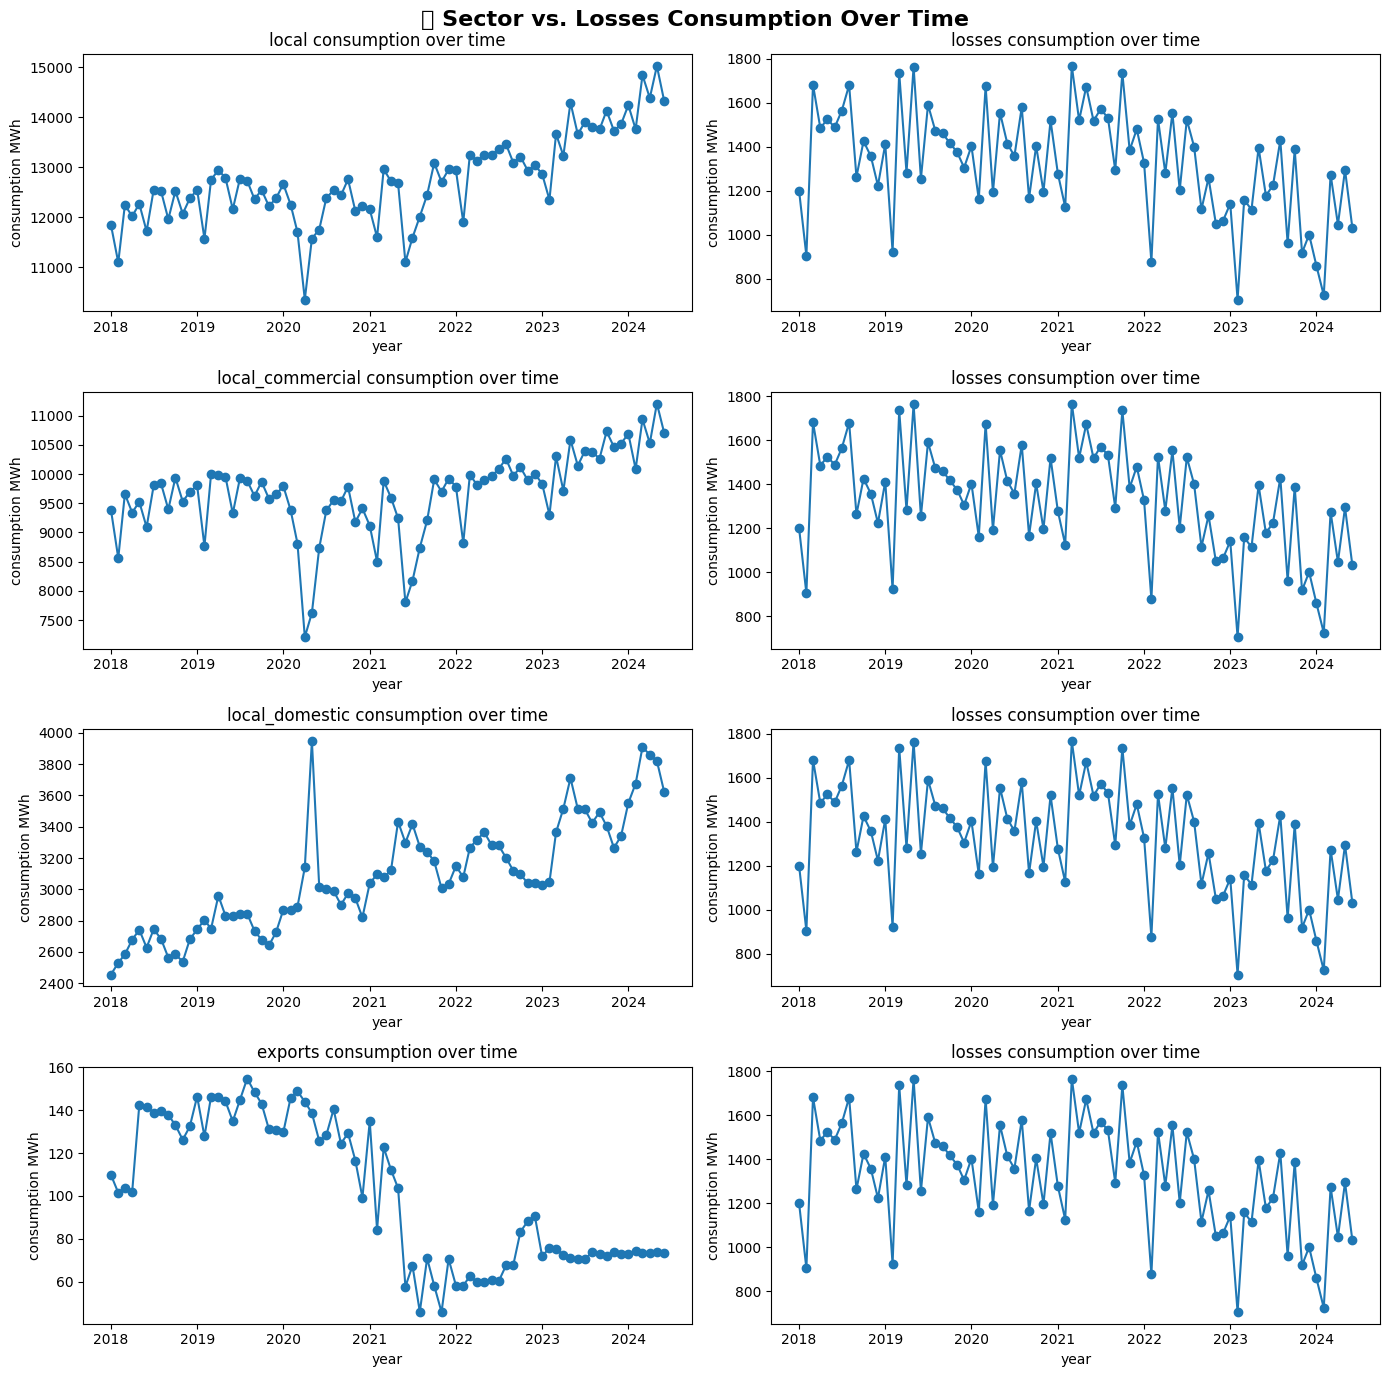

In [175]:
#@title Comparison of sectors vs losses consumption overtime
fig, axes = plt.subplots(4,2, figsize = (14,14))
fig.suptitle('Sector vs. Losses Consumption Over Time', fontsize=16, fontweight='bold')
axes = axes.flatten()
sectors = ['local', 'local_commercial', 'local_domestic', 'exports']
x=0
for i in range(8):
  if i in [1,3,5,7]:
    axes[i].plot(fl[fl['sector']=='losses']['date'], fl[fl['sector']=='losses']['consumption'], marker='o')
    axes[i].set_title(f'losses consumption over time')
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('consumption MWh')
  else:
    axes[i].plot(fl[fl['sector']==f'{sectors[x]}']['date'], fl[fl['sector']==f'{sectors[x]}']['consumption'], marker='o')
    axes[i].set_title(f'{sectors[x]} consumption over time')
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('consumption MWh')
    x+=1

  plt.tight_layout()
  #plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()



In [237]:
fl['date'] = pd.to_datetime(fl['date'])
local_domestic_data = fl[(fl['sector']=='local_domestic')&(fl['date'].dt.year==2020)]
print(local_domestic_data)
meanvalue=local_domestic_data['consumption'].mean()
print(f"\nmean value: {meanvalue}")

          date          sector  consumption  year
258 2020-01-01  local_domestic  2869.344265  2020
259 2020-02-01  local_domestic  2868.095536  2020
260 2020-03-01  local_domestic  2889.730125  2020
261 2020-04-01  local_domestic  3139.858915  2020
262 2020-05-01  local_domestic  3947.557468  2020
263 2020-06-01  local_domestic  3017.847066  2020
264 2020-07-01  local_domestic  3004.741730  2020
265 2020-08-01  local_domestic  2989.842653  2020
266 2020-09-01  local_domestic  2901.563701  2020
267 2020-10-01  local_domestic  2973.938122  2020
268 2020-11-01  local_domestic  2943.476440  2020
269 2020-12-01  local_domestic  2820.590811  2020

mean value: 3030.5489027499993


Based on the comparison between different sectors and losses in consumption over time. We can observe that except exports, most of the sectos included `local`and `local_commercial` are sharing the similar trend while increasing over the year.

Meanwhile, `local_domestic` are also experiencing increasing trend but in between of `2020`-`2021`, it experience a overshoot in electricity consumption. According to the mean value of the consumption during 2020 was observed a 3947.557, however the mean value during `2020` is 3030.549. Hence, overshoot value can be consider as a noise or it also can be a period with more than average usage such as sudden demands that cause higher operation as usual.

Lastly, `exports` are experiencing decreasing trend across 2024.

while all 4 sectors comparing with losses consumption we can see a significant difference in trend pattern between 2 of them. Losses plot show a high fluctuation trend while stablize between `800`-`1800` consumption. This show that the country has a high efficiency usage in utilizing electricity.

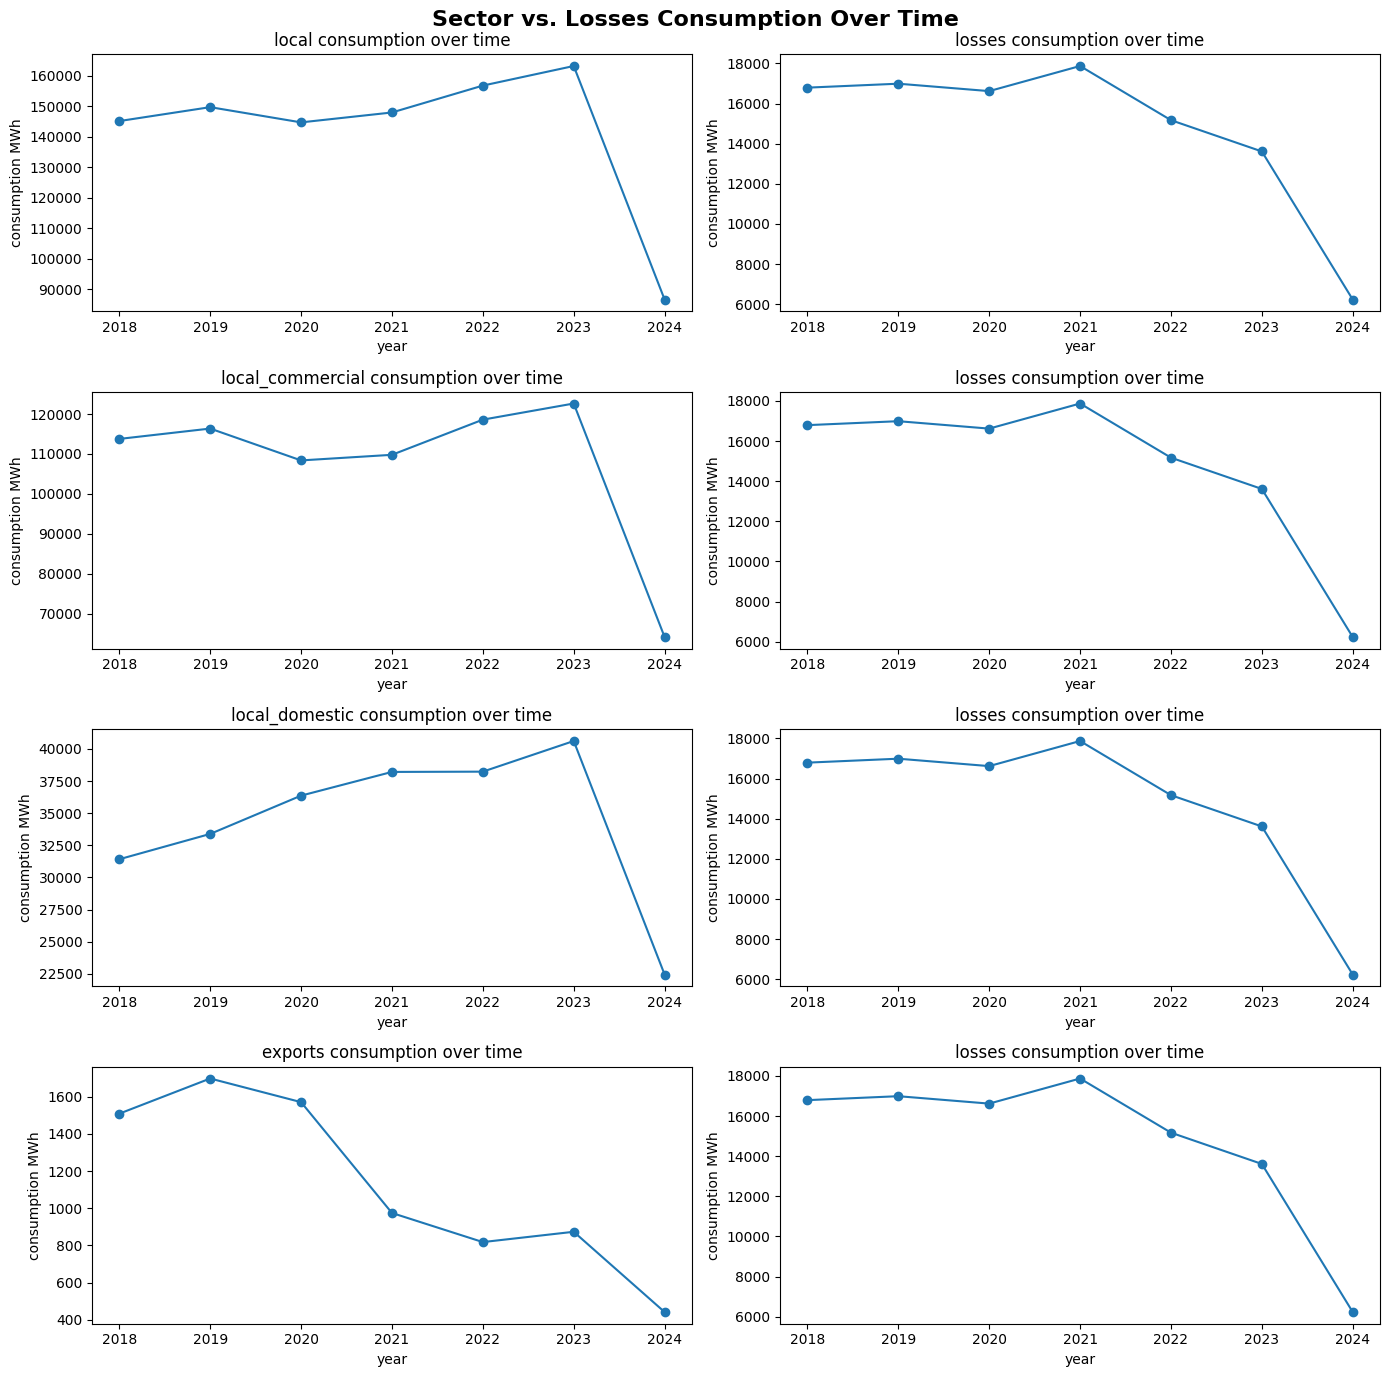

In [176]:
#@title Comparison of sum of sectors  vs sum of losses consumption overtime
fig, axes = plt.subplots(4,2, figsize = (14,14))
fig.suptitle('Sum of Sectors vs. sum of Losses Consumption Over Time', fontsize=16, fontweight='bold')
axes = axes.flatten()
sectors = ['local', 'local_commercial', 'local_domestic', 'exports']
total_test2_year = fl[fl['sector'] == 'losses'].groupby('year')['consumption'].sum()
x=0
for i in range(8):
  if i in [1,3,5,7]:
    axes[i].plot(total_test2_year.index, total_test2_year, marker='o')
    axes[i].set_title(f'losses consumption over time')
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('consumption MWh')
  else:
    axes[i].plot(fl[fl['sector'] == f'{sectors[x]}'].groupby('year')['consumption'].sum().index, fl[fl['sector'] == f'{sectors[x]}'].groupby('year')['consumption'].sum(), marker='o')
    axes[i].set_title(f'{sectors[x]} consumption over time')
    axes[i].set_xlabel('year')
    axes[i].set_ylabel('consumption MWh')
    x+=1

  plt.tight_layout()
  #plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

In this plot display the sum of the sector's electricity consumption vs. losses consumption. With sum of the consumption, a more clear trend were display in th plot showing that all three `local`,`local_commercial`, and `local_domestic` showing a increase in consumption meanwhile experiece a decrease in consumption over the year of 2023 to 2024.

while `exports` is sharing the same trait of the trend but with a slopper decreasing pattern in the graph.

by comparing with `losses` plot, interestingly the losses also showing a similar trend which experiencing a decrease over the period.

From the trait of the trend, consumption is decrease over the year are affected by the introduction of new source of energy generation. Furthermore, as losses in consumption are showing due to high efficiency energy generation. Hence, lower losses compare to during 2018 to 2021.

78     11845.900250
79     11091.957006
80     12244.089947
81     12018.584577
82     12267.998390
           ...     
151    13762.007151
152    14845.855921
153    14388.609899
154    15028.827927
155    14325.641302
Name: consumption, Length: 78, dtype: float64


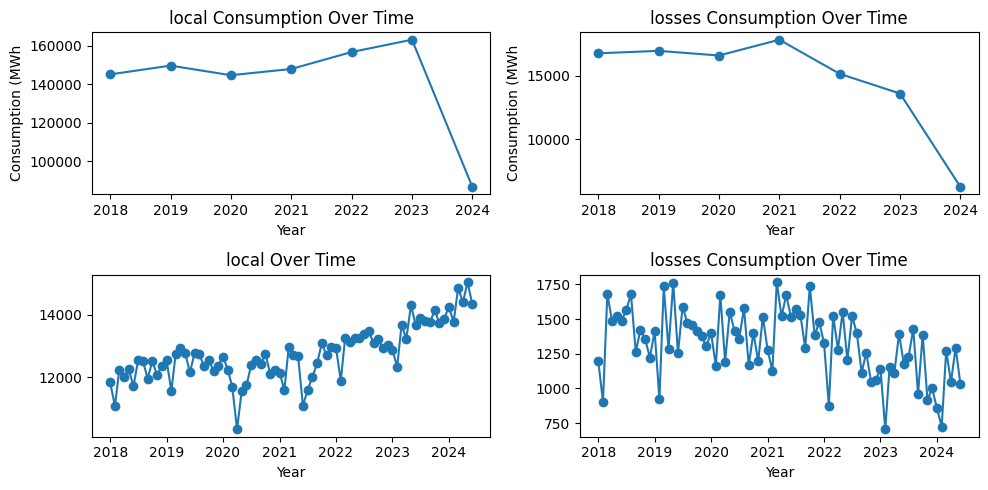

In [149]:
#@title local consumption vs loss consumption


fig, axes = plt.subplots(2,2, figsize=[10,5])
axes = axes.flatten()
test1 = 'local'
test2 = 'losses'
total_test1_year = fl[fl['sector'] == f'{test1}'].groupby('year')['consumption'].sum()
total_test2_year = fl[fl['sector'] == f'{test2}'].groupby('year')['consumption'].sum()

print(fl[fl['sector']==f'{test1}']['consumption'])

#Local consumption plot
axes[0].plot(total_test1_year.index, total_test1_year.values, marker='o', label=f'{test1} Consumption')
axes[0].set_title(f'{test1} Consumption Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Consumption (MWh')

#Losses consumption plot
axes[1].plot(total_test2_year.index, total_test2_year.values, marker='o', label=f'{test2} Consumption')
axes[1].set_title(f'{test2} Consumption Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Consumption (MWh')

#local Consumption overtime full data range
axes[2].plot(fl[fl['sector']==f'{test1}']['date'], fl[fl['sector']==f'{test1}']['consumption'], marker='o', label=f'{test1} Consumption')
axes[2].set_title(f'{test1} Over Time')
axes[2].set_xlabel('Year')

#losses consumption overtime full data range
axes[3].plot(fl[fl['sector']==f'{test2}']['date'], fl[fl['sector']==f'{test2}']['consumption'], marker='o', label=f'{test2} Consumption')
axes[3].set_title(f'{test2} Consumption Over Time')
axes[3].set_xlabel('Year')
plt.tight_layout()
plt.show()

156     9390.080801
157     8561.415143
158     9659.320215
159     9340.784017
160     9525.937602
           ...     
229    10086.551991
230    10938.007145
231    10528.203484
232    11208.544402
233    10703.791218
Name: consumption, Length: 78, dtype: float64


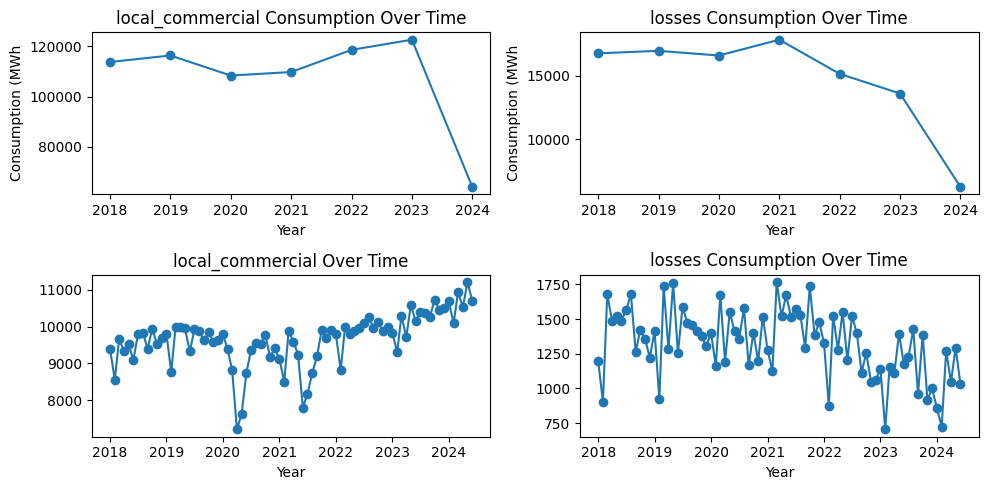

In [148]:
#@title local_commercial vs losses consumpiton

fig, axes = plt.subplots(2,2, figsize=[10,5])
axes = axes.flatten()
test1 = 'local_commercial'
test2 = 'losses'
total_test1_year = fl[fl['sector'] == f'{test1}'].groupby('year')['consumption'].sum()
total_test2_year = fl[fl['sector'] == f'{test2}'].groupby('year')['consumption'].sum()
print(fl[fl['sector']==f'{test1}']['consumption'])


#Local consumption plot
axes[0].plot(total_test1_year.index, total_test1_year.values, marker='o', label=f'{test1} Consumption')
axes[0].set_title(f'{test1} Consumption Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Consumption (MWh')

#Losses consumption plot
axes[1].plot(total_test2_year.index, total_test2_year.values, marker='o', label=f'{test2} Consumption')
axes[1].set_title(f'{test2} Consumption Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Consumption (MWh')

#local Consumption overtime full data range
axes[2].plot(fl[fl['sector']==f'{test1}']['date'], fl[fl['sector']==f'{test1}']['consumption'], marker='o', label=f'{test1} Consumption')
axes[2].set_title(f'{test1} Over Time')
axes[2].set_xlabel('Year')

#losses consumption overtime full data range
axes[3].plot(fl[fl['sector']==f'{test2}']['date'], fl[fl['sector']==f'{test2}']['consumption'], marker='o', label=f'{test2} Consumption')
axes[3].set_title(f'{test2} Consumption Over Time')
axes[3].set_xlabel('Year')
plt.tight_layout()
plt.show()

#`Conclusion`
```markdown
1. the electricity consumption is increase over the year in almost each sector due to advancement in technology, increasing in demand such as lifestyle product which required shipping from international, increasing in vehicle and lastly increasing in electricity consumption as revolutionary advance in each sector.
2. in 2024 the electricity consumption decrease, which was partially due to renewable energy integration. More industry has exposed to using renewable energy such as solar generation to reduce the electricity consumption from TNB.
3. The introduction in EV which influence alot of user replace from diesel/petrol vehicle to Electric vehicle also part of the influence to the decrease in electricity consumption in 2024.
```